In [2]:
import numpy as np
import cv2
import h5py
import keras
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.core import Dense, Flatten 
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization 
from keras.layers.convolutional import *
from keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import model_from_json

Using TensorFlow backend.


# Importing Image from PC 

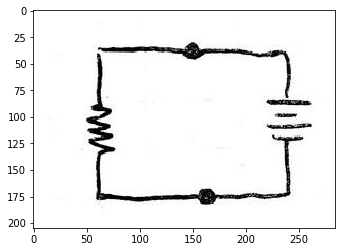

In [3]:
#Loading the image to be tested
test_image = cv2.imread('circuit2.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')
#Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

[46, 26, 220, 161]


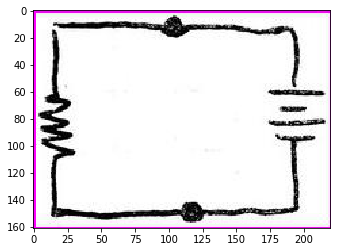

In [4]:
n = 0;
image = test_image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV) 
#threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 4) # dilate
image2,contours, hierarchy =cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
# get contours
# for each contour found, draw a rectangle around it on original 
image
i = [];
for contour in contours:
     
    # get rectangle bounding contour
   
    [x,y,w,h] = cv2.boundingRect(contour)
    a =  [x,y,w,h]
  
    # discard areas that are too large
 
    if h>300 and w>300:
 
        continue
    # discard areas that are too small
 
    if h<100 or w<100:
 
        continue
    # draw rectangle around contour on original image

    newrect = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
    i.append(a)

# write original image with added contours to disk  
cv2.imwrite("contoured.jpg", image)
components = []
image = cv2.imread("contoured.JPG")
for x in i:
    print(x)
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    crop_img2 = image[b:b+d, a:a+c]
    plt.imshow(crop_img2, cmap='gray')


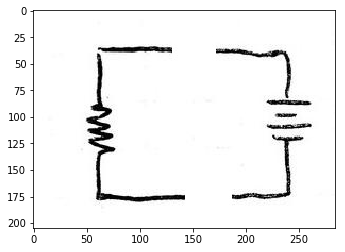

In [5]:
cascade = cv2.CascadeClassifier('cascade.xml')

img = cv2.imread('circuit2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dots = cascade.detectMultiScale(gray, 1.1, 3)
for (x,y,w,h) in dots:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),-1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

cv2.imwrite('testdot.jpg',img)
image = cv2.imread('testdot.jpg')
plt.imshow(image, cmap='gray')


[[168, 32, 98, 150]]
[[168, 32, 98, 150], [46, 30, 101, 155]]


True

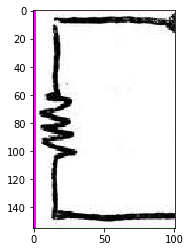

In [6]:

n = 0;
image = cv2.imread("testdot.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
_,thresh = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV) 
#threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilated = cv2.dilate(thresh,kernel,iterations = 4) # dilate
image2,contours, hierarchy =cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
# get contours
# for each contour found, draw a rectangle around it on original 
image
i = [];
for contour in contours:
     
    # get rectangle bounding contour
   
    [x,y,w,h] = cv2.boundingRect(contour)
    m =  [x,y,w,h]
  
    # discard areas that are too large
 
    if h>300 and w>300:
 
        continue
    # discard areas that are too small
 
    if h<40 or w<40:
 
        continue
    # draw rectangle around contour on original image

    newrect = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
    i.append(m)
    components = []
    image = cv2.imread("contoured.JPG")
    n = 0
    print(i)
    for x in i:
        a = x[0]
        b = x[1]
        c = x[2]
        d = x[3]
        crop_img2 = image[b:b+d, a:a+c]
        components.append(crop_img2)
        n+=1
        filename = "component_%d.jpg"%n
        cv2.imwrite( filename, crop_img2 );
        plt.imshow(crop_img2, cmap='gray')

# write original image with added contours to disk  
cv2.imwrite("contoured.jpg", image)



# Resistor Cascade Recog. 

In [18]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cascade_test = cv2.CascadeClassifier('res_updated/classifier/cascade.xml')

obj_rects = cascade_test.detectMultiScale(test_image_gray, scaleFactor = 1.1, minNeighbors = 2);

# Let us print the no. of faces found
print('Resistors found: ', len(obj_rects))

Resistors found:  1


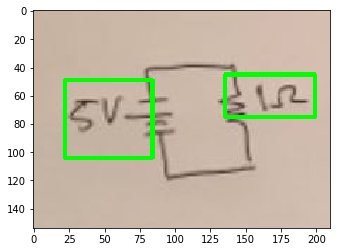

In [19]:

for (x,y,w,h) in obj_rects:
    cv2.rectangle(test_image, (x-w, y+2), (x+w, y+h), (0, 255, 0), 2)
        
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

if len(obj_rects) != 0: 

    crop_img =test_image[y+1:y+h, x-w:x+w]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)
    
#print(crop_img)

# Importing VGG Model and weights for Resistor

In [20]:
vgg19_model = keras.applications.vgg19.VGG19() 
#downloads vgg16 model from keras aplications 
#creates a model named 'model' that is of Sequential form , VGG16 is in a non-sequential model 
model = Sequential()
for layer in vgg19_model.layers[:-1]:  # deletes last layer of VGG16 as VGG16 pertains to 1000 classes, we have 6
    model.add(layer) # add  a layer back to the bottom 
for layer in model.layers:
    layer.trainable = False
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))  # add a dense 6 output layer, we have 6 classes 
#model.summary()



# load weights into new model
model.load_weights("updatedResWeights.h5") #pre-trained weights 
print("done Loading")

Loaded model from disk


# Plotting Images Function

In [21]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None ):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range (len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

# RESISTOR PREDICTIONS

[[5.3768557e-01 1.2227277e-04 3.0183393e-04 1.1170416e-01 3.5018611e-01]]
 
 
resistor image predicted value is:
[53.76856] % 1 Ohm
 


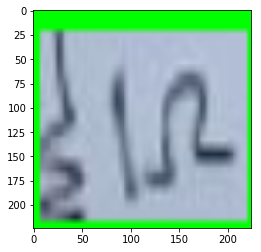

In [22]:

resized =cv2.resize(crop_img, (224,224))
#resized cropped image to [224, 224] as VGG takes in images of [224, 224, 3] 
# Displaying the grayscale image



#convert image of [224, 224] to 'numpy array' of [224, 224, 3] to be inserted into predict function 
input = cv2.resize(resized, (224 , 224)).reshape((224 , 224,3))# .astype('float32') / 8


plt.imshow(resized)
#insert into predictions function 
predictions = model.predict(np.array([input]))
print(predictions)

#max_val = np.max(predictions) 
location = np.argmax(predictions) #index of max value in array
max_val = predictions[:,location] #grabs value at index 
    
print(" ")
print(" ")



print("resistor image predicted value is:")
if location == 0:
            print(max_val*100 , "% 1 Ohm")
            array = [ 'R', 1]  
            print(" ")
if location == 1:
            print(max_val*100,"% 2 Ohms")
            array = [ 'R', 2]  
            
            print(" ")
if location == 2:
            print(max_val*100,"% 3 Ohms")
            array = [ 'R', 3]  
            print(" ")
if location == 3:
            print(max_val*100,"% 4 Ohms")
            array = [ 'R', 4]  
            print(" ")
if location == 4:
            print(max_val*100,"% 5 Ohm")
            array = [ 'R', 5]  
            print(" ")


# Voltage Cascade Recog.

In [23]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cascade_test = cv2.CascadeClassifier('volt_cascade/classifier/cascade.xml')

obj_rects = cascade_test.detectMultiScale(test_image_gray, scaleFactor = 1.1, minNeighbors = 30);

# Let us print the no. of faces found
print('voltage found: ', len(obj_rects))

voltage found:  1


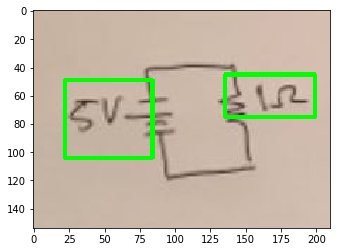

In [24]:

for (x,y,w,h) in obj_rects:
    cv2.rectangle(test_image, (x-w, y+2), (x+5, y+h), (0, 255, 0), 2)
        
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

if len(obj_rects) != 0: 

    crop_img =test_image[y+1:y+h, x-w-4:x-5]
    cv2.imshow("crop_img", crop_img)
    cv2.waitKey(0)
    
#print(crop_img)

In [25]:
vgg19_model = keras.applications.vgg19.VGG19() 
#downloads vgg16 model from keras aplications 
#creates a model named 'model' that is of Sequential form , VGG16 is in a non-sequential model 
model = Sequential()
for layer in vgg19_model.layers[:-1]:  # deletes last layer of VGG16 as VGG16 pertains to 1000 classes, we have 6
    model.add(layer) # add  a layer back to the bottom 
for layer in model.layers:
    layer.trainable = False
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))  # add a dense 6 output layer, we have 6 classes 
#model.summary()



# load weights into new model
model.load_weights("voltWeights.h5") #pre-trained weights 
print("Loaded model from disk")

Loaded model from disk


[[5.3784525e-01 3.8826585e-04 2.0521842e-02 3.5403547e-01 8.7209180e-02]]
 
 
resistor image predicted value is:
[53.784527] % 1 volt
 


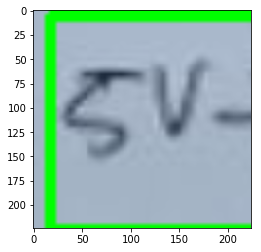

In [26]:
resized =cv2.resize(crop_img, (224,224))
#resized cropped image to [224, 224] as VGG takes in images of [224, 224, 3] 
# Displaying the grayscale image



#convert image of [224, 224] to 'numpy array' of [224, 224, 3] to be inserted into predict function 
input = cv2.resize(resized, (224 , 224)).reshape((224 , 224,3))# .astype('float32') / 8


plt.imshow(resized)
#insert into predictions function 
predictions = model.predict(np.array([input]))
print(predictions)

#max_val = np.max(predictions) 
location = np.argmax(predictions) #index of max value in array
max_val = predictions[:,location] #grabs value at index 
    
print(" ")
print(" ")



print("resistor image predicted value is:")
if location == 0:
            print(max_val*100 , "% 1 volt")
            array2 = [ 'V', 1]  
            print(" ")
if location == 1:
            print(max_val*100,"% 2 volts")
            array2 = [ 'V', 2]  
            
            print(" ")
if location == 2:
            print(max_val*100,"% 3 volts")
            array2 = [ 'V', 3]  
            print(" ")
if location == 3:
            print(max_val*100,"% 4 volts")
            array2 = [ 'V', 4]  
            print(" ")
if location == 4:
            print(max_val*100,"% 5 volts")
            array2 = [ 'V', 5]  
            print(" ")


# Exporting as Netlist File for Ext. Circ. Analyzer

In [27]:
from tkinter import *
import sys
#import numpy as np

test = [["Circuit 1", 'R', 1, 'V', 1], ["Circuit 2", 'V', 2, 'R', 1], ["Circuit 3", 'R', 2, 'V', 3],
        ["Circuit 4", 'V', 4, 'R', 2], ["Circuit 5", 'R', 3, 'V', 5], ["Circuit 6", 'V', 1, 'R', 3],
        ["Circuit 7", 'R', 4, 'V', 2], ["Circuit 8", 'V', 3, 'R', 4], ["Circuit 9", 'R', 5, 'V', 4],
        ["Circuit 10", 'V', 5, 'R', 5]]
test2 = ["Big Circuit", 'V', 1, 'R', 1, 'R', 1, 'V', 1]
def export(input_components):
    sum = 0
    i = 1
    j = 1
    netlist = open("%s.cir" % (input_components[0]), "a+")
    netlist.write("** ICARIS generated Circuit **\r\n")
    while (i < len(input_components)-2):
        if (input_components[i] == 'R'):
            netlist.write("r%d %d %d %d\r\n" % (j, j, j-1, input_components[i + 1]))
        if (input_components[i] == 'V'):
            netlist.write("v%d %d %d dc %d\r\n" % (j, j, j-1, input_components[i + 1]))
        i += 2
        j += 1
    if (input_components[i] == 'R'):
        netlist.write("r%d %d 0 %d\r\n" % (j, j-1,  input_components[i + 1]))
    if (input_components[i] == 'V'):
        netlist.write("v%d %d 0 dc %d\r\n" % (j, j-1, input_components[i + 1]))
    netlist.write(".END")
    netlist.close()

k = 0
#TGUI(export(test)
#while (k < len(test)):
    #print(test[k])
#    export(test[k])
#    k += 1

merge_test = ["merge_circuit"] + array + array2
export(merge_test)

print (merge_test)
print ( "done exporting")

['merge_circuit', 'R', 1, 'V', 1]
done exporting
